In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Read in our csv data (>100Mb so takes a while)

df_actors=pd.read_csv("../name.basics.tsv.gz",sep="\t")
df_main=pd.read_csv("../title.basics.tsv.gz",sep="\t")
df_ratings=pd.read_csv("../title.ratings.tsv.gz",sep="\t")

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Remove null values
df_main=df_main.loc[df_main["genres"]!=r"\N",:]
df_main=df_main.loc[df_main["startYear"]!=r"\N",:]
# df_main=df_main.loc[df_main["endYear"]!=r"\N",:]
df_main=df_main.loc[df_main["runtimeMinutes"]!=r"\N",:]


In [4]:
df_main["startYear"] = df_main["startYear"].astype("int64")
df_main["runtimeMinutes"] = df_main["runtimeMinutes"].astype("int64")
df_main=df_main.drop(columns="endYear")
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1773254 entries, 0 to 6293396
Data columns (total 8 columns):
tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           int64
startYear         int64
runtimeMinutes    int64
genres            object
dtypes: int64(3), object(5)
memory usage: 121.8+ MB


In [5]:
df_main=df_main.loc[df_main["titleType"]=="movie",:]
df_main=df_main.loc[df_main["startYear"]>1998,:]

In [6]:
df_main.reset_index().drop(columns="index")

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,118,"Comedy,Fantasy,Romance"
1,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,122,Drama
2,tt0085953,movie,Devil Fetus,Mo tai,0,2019,84,Horror
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002,126,Drama
5,tt0100275,movie,The Wandering Soap Opera,La Telenovela Errante,0,2017,80,"Comedy,Drama,Fantasy"
6,tt0102362,movie,Istota,Istota,0,2000,80,"Drama,Romance"
7,tt0108549,movie,West from North Goes South,West from North Goes South,0,2004,96,"Comedy,Mystery"
8,tt0109173,movie,Auf allen Meeren,Auf allen Meeren,0,2002,95,Documentary
9,tt0109659,movie,Dozhdi v okeane,Dozhdi v okeane,0,2005,73,Drama


In [16]:
# Merge our two tables to get ratings and votes
# Remove outliers in runtime
df_full=df_main.merge(df_ratings,on=["tconst"],how="inner")
df_full=df_full.loc[df_full["runtimeMinutes"]<600,:]

In [21]:
# Sort by number of votes for most "accurate" ratings
df_sorted_by_votes=df_full.sort_values("numVotes",ascending=False).reset_index().drop(columns="index")
df_sorted_by_votes.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,152,"Action,Crime,Drama",9.0,2131901
1,tt1375666,movie,Inception,Inception,0,2010,148,"Action,Adventure,Sci-Fi",8.8,1890955
2,tt0137523,movie,Fight Club,Fight Club,0,1999,139,Drama,8.8,1723573
3,tt0133093,movie,The Matrix,The Matrix,0,1999,136,"Action,Sci-Fi",8.7,1552565
4,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,178,"Adventure,Drama,Fantasy",8.8,1547334


In [9]:
# Two new dataframes looking at purely Drama and purely Comedy movies for the top 100 in each genre
df_drama=df_sorted_by_votes.loc[df_sorted_by_votes["genres"]=="Drama",:].head(100)
df_comedy=df_sorted_by_votes.loc[df_sorted_by_votes["genres"]=="Comedy",:].head(100)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


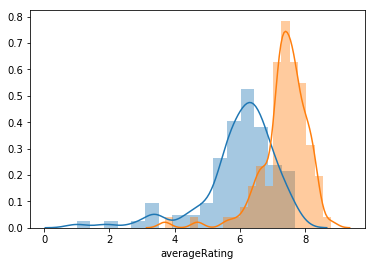

In [10]:
# Let's see what the distribution looks like and if there is a difference in the top 100 movies.
sns.distplot(df_comedy.averageRating)
sns.distplot(df_drama.averageRating)

In [17]:
# No correlation between runtime and rating
# sns.scatterplot(data=df_sorted_by_votes.head(200),x="runtimeMinutes",y="averageRating")

In [18]:
df_sorted_by_votes_drama=df_sorted_by_votes[df_sorted_by_votes["genres"].str.contains("Comedy")!=True]
df_sorted_by_votes_drama=df_sorted_by_votes_drama[df_sorted_by_votes_drama["genres"].str.contains("Drama")==True]
df_sorted_by_votes_comedy=df_sorted_by_votes[df_sorted_by_votes["genres"].str.contains("Comedy")==True]
df_sorted_by_votes_comedy=df_sorted_by_votes_comedy[df_sorted_by_votes_comedy["genres"].str.contains("Action")!=True]


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


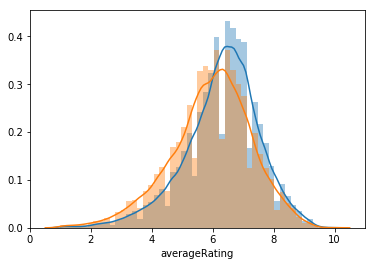

In [19]:
sns.distplot(df_sorted_by_votes_drama.averageRating)
sns.distplot(df_sorted_by_votes_comedy.averageRating)

In [20]:
df_actors.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0043044,tt0072308,tt0053137,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0117057,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0059956,tt0057345,tt0054452,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,writer,soundtrack","tt0072562,tt0077975,tt0078723,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0083922,tt0069467,tt0050986"
